In [1]:
from PIL import Image
import requests
from transformers import Qwen2VLForConditionalGeneration, AutoProcessor

model_name = "scb10x/typhoon2-qwen2vl-7b-vision-instruct"

model = Qwen2VLForConditionalGeneration.from_pretrained(
    model_name, torch_dtype="auto", device_map="auto"
)
processor = AutoProcessor.from_pretrained(model_name)

# Image
url = "https://cdn.pixabay.com/photo/2023/05/16/09/15/bangkok-7997046_1280.jpg"
image = Image.open(requests.get(url, stream=True).raw)

conversation = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
            },
            {"type": "text", "text": "ระบุชื่อสถานที่และประเทศของภาพนี้เป็นภาษาไทย"},
        ],
    }
]


# Preprocess the inputs
text_prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)

inputs = processor(
    text=[text_prompt], images=[image], padding=True, return_tensors="pt"
)
inputs = inputs.to("cuda")

output_ids = model.generate(**inputs, max_new_tokens=128)
generated_ids = [
    output_ids[len(input_ids) :]
    for input_ids, output_ids in zip(inputs.input_ids, output_ids)
]
output_text = processor.batch_decode(
    generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True
)
print(output_text)
# ['พระบรมมหาราชวัง, กรุงเทพฯ, ประเทศไทย']


config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/56.5k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.69G [00:00<?, ?B/s]

`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/567 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

['พระบรมมหาราชวัง, กรุงเทพฯ, ประเทศไทย']


In [3]:
!kaggle competitions download -c image-processing-thai-language-image-captioning

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


 99%|██████████████████████████████████████▊| 1.74G/1.75G [00:10<00:00, 179MB/s]
100%|███████████████████████████████████████| 1.75G/1.75G [00:10<00:00, 178MB/s]


In [ ]:
!unzip image-processing-thai-language-image-captioning.zip

In [6]:
# from datasets import load_dataset
import numpy as np
from PIL import Image
# # dataset = load_dataset("unsloth/LaTeX_OCR", split = "train")
# dataset = load_dataset("saksornr/coco_caption-thai-ipu24-train-sample10k", split = "train")
# dataset = dataset.select(range(0, 1000))
def load_image(image_path):
    """
    Load an image from the given path and return it as a PIL Image.
    
    Args:
        image_path (str): Path to the image file.
        
    Returns:
        Image: PIL Image object.
    """
    try:
        return Image.open(image_path).convert("RGB")
    except Exception as e:
        # print(f"Error loading image from {image_path}: {e}")
        return None

In [7]:
import pandas as pd
df1 = pd.read_csv("sample_submission.csv")

In [8]:
df1.head()

,image_id,caption
0,1354,ภาพถ่ายระยะใกล้ของวัตถุทรงกลมสีขาวที่มีคราบสีด...
1,1413,นกตัวหนึ่งที่กําลังเกาะอยู่บนกิ่งไม้อันหนึ่งที...
2,1802,บ้านที่อยู่ติดกับบริเวณริมชายหาดทะเลและมีต้นไม...
3,1243,NaN
4,693,NaN


['ภาพแสดงสิ่งมีชีวิตที่มีลักษณะคล้ายหัวใจและมีเส้นใยขาวกระจายอยู่บนพื้นผิวที่ดูเหมือนเป็นดินหรือทราย']


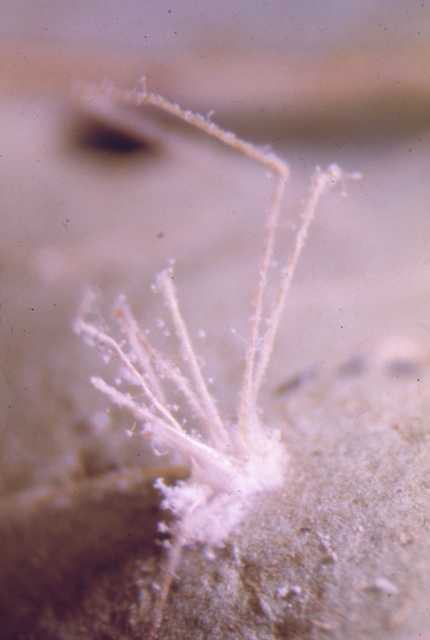

In [108]:
image = load_image(f"/workspace/test/test/{str(1354).zfill(5)}.jpg")
# instruction = "Caption this image in Thai"
instruction = """Analyze image and generate accurate, informative and culturally relevant captions in Thai."""
messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]
# Preprocess the inputs
text_prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(
    text=[text_prompt], images=[image], padding=True, return_tensors="pt"
)
inputs = inputs.to("cuda")

output_ids = model.generate(**inputs, max_new_tokens=256, temperature=1.5, min_p=0.1, repetition_penalty=1.05)
generated_ids = [
    output_ids[len(input_ids) :]
    for input_ids, output_ids in zip(inputs.input_ids, output_ids)
]
output_text = processor.batch_decode(
    generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True
)
print(output_text)
image

In [99]:
df1.iloc[21][0]

/tmp/ipykernel_143/371172680.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df1.iloc[21][0]


1469

In [ ]:
import tqdm

for i in tqdm.tqdm(range(len(df1))):
    image = load_image(f"/workspace/test/test/{str(df1.iloc[i,0]).zfill(5)}.jpg")
    # instruction = "Caption this image in Thai"
    instruction = """Analyze image and generate accurate, informative and culturally relevant captions in Thai."""
    messages = [
        {"role": "user", "content": [
            {"type": "image"},
            {"type": "text", "text": instruction}
        ]}
    ]
    # Preprocess the inputs
    text_prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
    inputs = processor(
        text=[text_prompt], images=[image], padding=True, return_tensors="pt"
    )
    inputs = inputs.to("cuda")
    
    output_ids = model.generate(**inputs, max_new_tokens=256, temperature=1.5, min_p=0.1, repetition_penalty=1.05)
    generated_ids = [
        output_ids[len(input_ids) :]
        for input_ids, output_ids in zip(inputs.input_ids, output_ids)
    ]
    output_text = processor.batch_decode(
        generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True
    )
    print(output_text[0])
    df1.iloc[i,1] = output_text[0]

  0%|          | 1/2000 [00:02<1:08:24,  2.05s/it]

ภาพแสดงสิ่งมีชีวิตที่มีลักษณะคล้ายหัวใจและมีเส้นใยขาวกระจายอยู่บนพื้นผิวที่ดูเหมือนเป็นดินหรือทราย


  0%|          | 2/2000 [00:03<54:30,  1.64s/it]  

ภาพของสัตว์ที่มีสีน้ำตาลและสีขาว กำลังนั่งอยู่บนก้อนหิน


  0%|          | 3/2000 [00:04<41:20,  1.24s/it]

ภูเขาที่มีต้นไม้และบ้านอยู่บนยอดเขา


  0%|          | 4/2000 [00:05<39:34,  1.19s/it]

ลิงตัวหนึ่งนั่งอยู่บนพื้นดินข้างกำแพงสีขาว


  0%|          | 5/2000 [00:06<43:55,  1.32s/it]

แมลงสองตัวที่มีลายสีสันสดใสกำลังเดินอยู่บนพื้นที่ปกคลุมด้วยใบไม้และหญ้า


  0%|          | 6/2000 [00:08<42:51,  1.29s/it]

ผักและผลไม้ที่ถูกหั่นเป็นชิ้นๆ วางอยู่ในจานสีดำ


  0%|          | 7/2000 [00:09<40:36,  1.22s/it]

ตะกร้าที่ทำจากไม้ไผ่ที่วางอยู่บนพื้นหญ้าสีเขียว


  0%|          | 8/2000 [00:11<52:26,  1.58s/it]

ภาพนี้แสดงให้เห็นสัตว์ที่มีขนสีดำและสีขาวกำลังยืนอยู่ในป่า ซึ่งอาจเป็นสัตว์ป่าท้องถิ่นของพื้นที่นั้น


  0%|          | 9/2000 [00:12<48:08,  1.45s/it]

ภาพของเห็ดที่ถูกแยกออกเป็นส่วนๆ วางอยู่บนพื้นหลังสีฟ้า


  0%|          | 10/2000 [00:13<45:38,  1.38s/it]

อาคารสีขาวที่มีขอบสีแดงและป้ายไม้สีน้ำตาลตั้งอยู่หน้าอาคาร


  1%|          | 11/2000 [00:15<44:16,  1.34s/it]

ภาพของสวนที่มีต้นไม้และพืชพรรณหลากหลาย รวมถึงต้นกล้วยและต้นปาล์ม


  1%|          | 12/2000 [00:16<40:31,  1.22s/it]

อาหารที่มีส่วนผสมของข้าว ผัก และเนื้อสัตว์


  1%|          | 13/2000 [00:17<42:32,  1.28s/it]

ผู้หญิงคนหนึ่งที่สวมผ้าโพกหัวและเสื้อสีขาวกำลังทำงานอยู่ในทุ่งนา


  1%|          | 14/2000 [00:18<38:40,  1.17s/it]

พระพุทธรูปสีทองที่ตั้งอยู่ในวัด


  1%|          | 15/2000 [00:19<34:05,  1.03s/it]

หนูที่มีขนาดประมาณ 10 เซนติเมตร


  1%|          | 16/2000 [00:20<37:31,  1.13s/it]

ภาพทิวทัศน์ของภูเขาที่มีต้นไม้และบ้านอยู่บนยอดเขา พร้อมกับทะเลที่สวยงาม


  1%|          | 17/2000 [00:21<38:34,  1.17s/it]

อาหารที่ประกอบด้วยข้าวผัดกับเนื้อสัตว์และผักต่างๆ


  1%|          | 18/2000 [00:22<33:21,  1.01s/it]

ปลาจำนวนมากที่อยู่ในน้ำสีเขียว


  1%|          | 19/2000 [00:23<35:06,  1.06s/it]

ต้นไม้ใหญ่ที่มีใบสีเขียวและมีรากที่เห็นได้ชัดเจน


  1%|          | 20/2000 [00:24<35:54,  1.09s/it]

ภาพทุ่งหญ้าสีเขียวที่มีภูเขาหินสีเทาอยู่ด้านหลัง


  1%|          | 21/2000 [00:25<37:05,  1.12s/it]

ภาพทิวทัศน์ของทะเลสาบและภูเขาที่มีต้นไม้ริมฝั่ง


  1%|          | 22/2000 [00:27<37:03,  1.12s/it]

ต้นไม้ในกระถางสีขาวที่มีใบสีเขียวและมีรอยสีน้ำตาล


  1%|          | 23/2000 [00:28<37:58,  1.15s/it]

ใบไม้สีเขียวที่มีรูปร่างคล้ายหัวใจและมีดอกไม้สีขาวอยู่บนใบ


  1%|          | 24/2000 [00:29<37:38,  1.14s/it]

สัตว์ที่มีเขาสีน้ำตาลกำลังกินอาหารจากภาชนะโลหะ


  1%|▏         | 25/2000 [00:30<32:25,  1.02it/s]

หนูที่นอนอยู่บนพื้นไม้


  1%|▏         | 26/2000 [00:31<42:11,  1.28s/it]

ผู้หญิงคนหนึ่งนั่งอยู่บนเก้าอี้สีแดง และมีผู้ชายคนหนึ่งที่สวมหน้ากากอนามัยกำลังให้เงินให้กับเธอ


  1%|▏         | 27/2000 [00:32<37:55,  1.15s/it]

ดอกไม้ที่มีลักษณะเฉพาะตัวและสีสันสดใส


  1%|▏         | 28/2000 [00:33<34:23,  1.05s/it]

ภูเขาที่มีต้นไม้และพืชพรรณที่หลากหลาย


  1%|▏         | 29/2000 [00:34<35:27,  1.08s/it]

แมลงที่มีสีน้ำตาลและสีเหลืองกำลังเดินอยู่บนพื้นดิน


  2%|▏         | 30/2000 [00:35<34:19,  1.05s/it]

นกที่ตายอยู่บนพื้นดินที่มีใบไม้และเศษอาหาร


  2%|▏         | 31/2000 [00:36<32:14,  1.02it/s]

พระธาตุสีขาวที่มีโครงเหล็กปกคลุมอยู่


  2%|▏         | 32/2000 [00:37<29:38,  1.11it/s]

เห็ดที่วางอยู่บนพื้นสีฟ้า


  2%|▏         | 33/2000 [00:38<32:19,  1.01it/s]

ภาพของสิ่งมีชีวิตที่มีสีส้มและสีดำบนพื้นดิน


  2%|▏         | 34/2000 [00:39<32:42,  1.00it/s]

รูปปั้นพระพุทธรูปที่มีหลายมือและหลายหัว


  2%|▏         | 35/2000 [00:40<33:29,  1.02s/it]

ผัดเผ็ดที่มีส่วนผสมของเส้นหมี่และผักหลากสีสัน


  2%|▏         | 36/2000 [00:41<36:26,  1.11s/it]

ภาพของสัตว์ที่มีลักษณะคล้ายกับงู มีสีดำและมีจุดขาวบนร่างกาย


  2%|▏         | 37/2000 [00:42<34:19,  1.05s/it]

พระพุทธรูปสีฟ้าที่วัดแห่งหนึ่ง


  2%|▏         | 38/2000 [00:43<32:14,  1.01it/s]

ผลไม้สีเขียวที่ยังไม่สุกบนต้นไม้


  2%|▏         | 39/2000 [00:44<30:58,  1.05it/s]

แมลงที่มีขนาดใหญ่และมีปีกสีน้ำตาล


  2%|▏         | 40/2000 [00:45<34:09,  1.05s/it]

ภาพของสัตว์สองตัวที่ยืนอยู่ในพื้นที่ที่มีหญ้าและต้นไม้


  2%|▏         | 41/2000 [00:46<33:02,  1.01s/it]

ภาพที่แสดงถึงถนนที่มีต้นไม้และคนเดินอยู่ข้างถนน


  2%|▏         | 42/2000 [00:48<42:00,  1.29s/it]

ดอกไม้ที่สวยงามในภาพนี้มีสีขาวและมีส่วนผสมของสีเหลือง ดอกไม้นี้มีลักษณะเฉพาะที่ทำให้มันโดดเด่นจากดอกไม้อื่นๆ


  2%|▏         | 43/2000 [00:50<49:01,  1.50s/it]

ภาพของสัตว์เลื้อยคลานที่มีสีน้ำตาลและสีดำ กำลังเดินอยู่บนพื้นที่เต็มไปด้วยหินและใบไม้แห้ง


  2%|▏         | 44/2000 [00:51<45:12,  1.39s/it]

ภาพของป่าที่มีต้นไม้และใบไม้สีน้ำตาลบนพื้นดิน


  2%|▏         | 45/2000 [00:52<43:08,  1.32s/it]

ภาพแสดงถึงเครื่องปั้นดินเผาที่วางอยู่บนพื้นหญ้าสีเขียว


  2%|▏         | 46/2000 [00:53<38:23,  1.18s/it]

แก้วชาเขียวที่มีลายศิลปะบนฟองนม


  2%|▏         | 47/2000 [00:54<38:38,  1.19s/it]

ผู้ชายคนหนึ่งนั่งอยู่ที่โต๊ะและใช้แล็ปท็อป


  2%|▏         | 48/2000 [00:57<46:43,  1.44s/it]

แมลงตัวหนึ่งที่มีสีแดงเข้มและมีปีกยาว กำลังนั่งอยู่บนพื้นที่เต็มไปด้วยหญ้าและใบไม้สีเขียว


  2%|▏         | 49/2000 [00:57<39:14,  1.21s/it]

ชายหาดที่มีต้นไม้และน้ำทะเล


  2%|▎         | 50/2000 [00:58<37:20,  1.15s/it]

ภาพถ่ายของเสือที่กำลังเดินอยู่ใกล้กับแหล่งน้ำ


  3%|▎         | 51/2000 [00:59<37:36,  1.16s/it]

นกสองตัวกำลังบินอยู่เหนือทะเลสาบที่มีต้นไม้และพืชสูง


  3%|▎         | 52/2000 [01:00<33:19,  1.03s/it]

ผลไม้ที่ห่อด้วยใบไม้สีเขียว


  3%|▎         | 53/2000 [01:01<33:01,  1.02s/it]

ภาพของกบสีเขียวที่กำลังนั่งอยู่บนพื้นดิน


  3%|▎         | 54/2000 [01:02<32:44,  1.01s/it]

เมฆสีขาวลอยอยู่เหนือกองเศษไม้สีแดงที่มีขนาดใหญ่


  3%|▎         | 55/2000 [01:03<34:48,  1.07s/it]

ภาพของอาคารที่มีตัวอักษรภาษาไทยและลวดลายศิลปะไทยอยู่บนเสาสีขาว


  3%|▎         | 56/2000 [01:04<33:02,  1.02s/it]

ภาพของสิ่งมีชีวิตที่อยู่ในรูบนไม้


  3%|▎         | 57/2000 [01:06<36:07,  1.12s/it]

ภาพที่แสดงให้เห็นถึงป่าที่มีต้นไม้สูงและมีนกจำนวนมากอยู่บนต้นไม้


  3%|▎         | 58/2000 [01:07<35:14,  1.09s/it]

อาคารหนึ่งที่มีป้ายใหญ่และธงชาติไทยอยู่ด้านบน


  3%|▎         | 59/2000 [01:08<41:34,  1.29s/it]

ดอกไม้ที่มีลักษณะคล้ายกับสัตว์หรือสิ่งมีชีวิตอื่นๆ ที่วางอยู่บนพื้นดิน


  3%|▎         | 60/2000 [01:10<41:05,  1.27s/it]

จานที่มีชามต่างๆ วางเรียงกัน มีไอศกรีมและอาหารอื่นๆ


  3%|▎         | 61/2000 [01:11<40:16,  1.25s/it]

ผลไม้สีเขียวที่มีสีแดงและสีเหลืองอยู่บนกิ่งไม้ในสวน


  3%|▎         | 62/2000 [01:13<45:46,  1.42s/it]

ผู้หญิงคนหนึ่งกำลังนั่งอยู่ที่โต๊ะไม้และมีถังสีดำที่เต็มไปด้วยสิ่งของต่างๆ


  3%|▎         | 63/2000 [01:14<42:43,  1.32s/it]

สะพานไม้ที่มีรั้วและต้นไม้รอบๆ ใกล้กับแม่น้ำ


  3%|▎         | 64/2000 [01:14<36:23,  1.13s/it]

หอยที่กำลังคลานไปบนต้นไม้


  3%|▎         | 65/2000 [01:15<35:19,  1.10s/it]

ภูเขาที่มีต้นไม้เขียวขจีและนกบินอยู่บนยอดเขา


  3%|▎         | 66/2000 [01:17<37:21,  1.16s/it]

ภาพของสัตว์ที่อยู่บนพื้นดินที่เต็มไปด้วยใบไม้และหญ้าแห้ง


  3%|▎         | 67/2000 [01:18<34:22,  1.07s/it]

ผู้หญิงสามคนกำลังทำงานร่วมกันในโรงงานผลิตขนม


  3%|▎         | 68/2000 [01:19<35:11,  1.09s/it]

นกสีน้ำตาลตัวเล็กๆ กำลังนั่งอยู่บนกิ่งไม้


  3%|▎         | 69/2000 [01:20<34:35,  1.08s/it]

สัตว์ที่มีเขาสีดำและหน้าผิวสีน้ำตาล


  4%|▎         | 70/2000 [01:21<38:10,  1.19s/it]

กะโหลกศีรษะของสัตว์ที่มีขนาดใหญ่กว่ากระดาษ A4 วางอยู่บนพื้นดิน


  4%|▎         | 71/2000 [01:22<38:45,  1.21s/it]

อาคารสีชมพูที่มีตัวอักษรสีน้ำเงินและสีขาวเขียนอยู่บนหลังคา


  4%|▎         | 72/2000 [01:24<39:06,  1.22s/it]

ผู้คนกำลังเดินข้ามแม่น้ำในป่าที่เต็มไปด้วยต้นไม้และหิน


  4%|▎         | 73/2000 [01:25<44:58,  1.40s/it]

ภาพแสดงถึงผ้าที่มีลวดลายแบบสี่เหลี่ยมจัตุรัส ซึ่งอาจจะเป็นผ้าปูที่นอนหรือผ้าห่ม


  4%|▎         | 74/2000 [01:27<49:16,  1.54s/it]

ภาพแสดงสิ่งมีชีวิตที่มีลักษณะคล้ายหิน ซึ่งอาจเป็นส่วนหนึ่งของธรรมชาติหรือสิ่งแวดล้อม


  4%|▍         | 75/2000 [01:28<45:49,  1.43s/it]

จิ้งหรีดสีน้ำตาลและสีดำที่กำลังยืนอยู่บนก้อนหิน


  4%|▍         | 76/2000 [01:29<37:41,  1.18s/it]

ภาพของงูที่นอนอยู่บนใบไม้


  4%|▍         | 77/2000 [01:30<33:32,  1.05s/it]

อาหารที่ประกอบด้วยข้าวผัดและไข่ดาว


  4%|▍         | 78/2000 [01:31<30:52,  1.04it/s]

ลูกปัดที่มีเมล็ดพืชอยู่ภายใน


  4%|▍         | 79/2000 [01:31<27:53,  1.15it/s]

ภาพใต้น้ำที่มีพืชและหิน


  4%|▍         | 80/2000 [01:33<31:43,  1.01it/s]

กล่องของขวัญที่มีลูกอมและขนมหวานต่างๆ วางเรียงกันอยู่บนโต๊ะ


  4%|▍         | 81/2000 [01:33<29:20,  1.09it/s]

ดอกไม้สีขาวที่มีใบเขียวอยู่ในสวน


  4%|▍         | 82/2000 [01:35<33:45,  1.06s/it]

รูปปั้นพระพุทธรูปสีดำสององค์และรูปปั้นคนยืนอยู่หน้า


  4%|▍         | 83/2000 [01:37<42:15,  1.32s/it]

ภาพของสัตว์ที่มีลักษณะคล้ายกับหนอนที่กำลังเดินอยู่บนพื้นดินที่เต็มไปด้วยใบไม้และเศษไม้


  4%|▍         | 84/2000 [01:37<37:29,  1.17s/it]

นักแสดงในชุดประจำชาติไทยกำลังแสดงบนเวที


  4%|▍         | 85/2000 [01:38<35:42,  1.12s/it]

ปลาที่ถูกตัดหัวออกและวางอยู่บนพื้นสีม่วง


  4%|▍         | 86/2000 [01:39<33:16,  1.04s/it]

ผักและผลไม้ที่จัดเรียงอย่างสวยงามบนโต๊ะ


  4%|▍         | 87/2000 [01:40<35:01,  1.10s/it]

ภาพแสดงโครงกระดูกของสัตว์ที่ถูกค้นพบในสถานที่ที่มีหินและดิน


  4%|▍         | 88/2000 [01:41<33:03,  1.04s/it]

แมลงที่มีสีน้ำตาลยาวอยู่บนพื้นดิน


  4%|▍         | 89/2000 [01:42<32:36,  1.02s/it]

เด็กๆ กลุ่มหนึ่งนั่งอยู่บนพื้นไม้


  4%|▍         | 90/2000 [01:44<36:23,  1.14s/it]

สะพานไม้ที่มีราวบันไดทั้งสองข้าง ล้อมรอบด้วยต้นไม้และพุ่มไม้


  5%|▍         | 91/2000 [01:44<31:45,  1.00it/s]

กล้วยหิน (Musa sapientum Linn.)


  5%|▍         | 92/2000 [01:46<35:17,  1.11s/it]

ภาพที่แสดงถึงพื้นที่ที่มีดินและหญ้าแห้ง พร้อมด้วยต้นไม้ในระยะไกล


  5%|▍         | 93/2000 [01:47<34:07,  1.07s/it]

ไข่ไก่ในตะกร้าสีน้ำเงินสองใบวางอยู่บนโต๊ะ


  5%|▍         | 94/2000 [01:48<38:03,  1.20s/it]

ภาพของต้นไม้ที่มีใบสีเขียวและมีดอกไม้สีขาวที่กำลังบานอยู่บนกิ่งไม้


  5%|▍         | 95/2000 [01:50<39:10,  1.23s/it]

ภาพของพืชที่มีใบสีเขียวและต้นไม้ที่มีใบสีเขียวอยู่ในสนามหญ้า


  5%|▍         | 96/2000 [01:51<42:22,  1.34s/it]

ภาพนี้แสดงให้เห็นคลื่นทะเลที่กำลังพัดลงบนชายหาดทราย คลื่นมีฟองสบู่และมีความชื้น


  5%|▍         | 97/2000 [01:52<36:58,  1.17s/it]

กระรอกกำลังเดินอยู่บนก้อนไม้ในป่า


  5%|▍         | 98/2000 [01:53<36:17,  1.15s/it]

แมลงที่มีสีส้มและน้ำตาลกำลังนั่งอยู่บนใบไม้


  5%|▍         | 99/2000 [01:54<34:23,  1.09s/it]

รูปปั้นสัตว์ที่วางอยู่บนพื้น


  5%|▌         | 100/2000 [01:55<34:47,  1.10s/it]

อาหารไทยที่มีเนื้อสัตว์และผักในน้ำซุปสีเหลือง


  5%|▌         | 101/2000 [01:56<33:34,  1.06s/it]

ผู้ชายคนหนึ่งที่วัดความสูงของต้นไม้ในสนามหญ้า


  5%|▌         | 102/2000 [01:57<35:31,  1.12s/it]

ผลไม้และพืชที่มีใบสีเขียวและสีน้ำตาลวางอยู่บนโต๊ะไม้


  5%|▌         | 103/2000 [01:58<32:18,  1.02s/it]

รูปปั้นสัตว์ที่ทำจากไม้


  5%|▌         | 104/2000 [01:59<31:09,  1.01it/s]

หินสีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว


  5%|▌         | 105/2000 [02:01<35:51,  1.14s/it]

เก้าอี้ไม้ที่มีพื้นที่นั่งเป็นสีน้ำตาลและมีแผ่นไม้ด้านหลัง


  5%|▌         | 106/2000 [02:01<32:27,  1.03s/it]

หินที่มีลักษณะคล้ายปลาบนพื้นดิน


  5%|▌         | 107/2000 [02:03<34:29,  1.09s/it]

ภาพนี้แสดงให้เห็นทะเลสาบที่มีผืนน้ำที่สงบและมีต้นไม้เป็นฉากหลัง


  5%|▌         | 108/2000 [02:04<37:35,  1.19s/it]

ใบไม้ที่มีสิ่งสกปรกและสิ่งมีชีวิตอื่นๆ อยู่บนพื้น


  5%|▌         | 109/2000 [02:05<31:55,  1.01s/it]

ปลาที่วางอยู่บนน้ำแข็ง


  6%|▌         | 110/2000 [02:05<29:34,  1.07it/s]

แมลงปอที่มีลายสีม่วงบนปีก


  6%|▌         | 111/2000 [02:06<28:37,  1.10it/s]

อาหารเช้าที่มีไข่ดาวและไข่เจียวในจานสีขาว


  6%|▌         | 112/2000 [02:07<31:51,  1.01s/it]

ลูกบอลสีน้ำตาลในภาชนะแก้วทรงรูปไข่ที่แขวนอยู่บนโซ่โลหะ


  6%|▌         | 113/2000 [02:08<31:01,  1.01it/s]

น้ำไหลผ่านหินที่เต็มไปด้วยพืชสีเขียว


  6%|▌         | 114/2000 [02:10<32:37,  1.04s/it]

ภาพทิวทัศน์ของภูเขาที่มีต้นไม้และพืชพรรณที่หลากหลาย


  6%|▌         | 115/2000 [02:10<31:03,  1.01it/s]

ภาพวาดที่แสดงคนสองคนกำลังเล่นกีฬาด้วยไม้


  6%|▌         | 116/2000 [02:12<32:13,  1.03s/it]

ภาพของกบตัวเล็กๆ ที่กำลังนั่งอยู่บนใบไม้สีเขียว


  6%|▌         | 117/2000 [02:13<39:21,  1.25s/it]

ภาพนี้แสดงให้เห็นถึงแหล่งน้ำที่มีหินและพืชที่อยู่ใต้น้ำ พร้อมกับการสะท้อนของต้นไม้บนผิวน้ำ


  6%|▌         | 118/2000 [02:15<44:00,  1.40s/it]

ภาพนี้แสดงให้เห็นวิวทะเลที่มีคลื่นและภูเขาในเบื้องหลัง ดูเหมือนว่าจะเป็นวันที่มีเมฆมาก


  6%|▌         | 119/2000 [02:17<44:58,  1.43s/it]

ภาพของสัตว์ที่มีสีน้ำตาลและลายทางบนลำตัว กำลังยืนอยู่บนกิ่งไม้ในป่า


  6%|▌         | 120/2000 [02:18<40:48,  1.30s/it]

ภาพของพืชที่มีสีน้ำตาลและใบไม้สีเขียว


  6%|▌         | 121/2000 [02:18<36:22,  1.16s/it]

แก้วน้ำใสที่วางอยู่บนพรมสีเงิน


  6%|▌         | 122/2000 [02:19<32:43,  1.05s/it]

อาคารที่มีประตูสีแดงและหลังคาสีแดงและทอง


  6%|▌         | 123/2000 [02:21<38:17,  1.22s/it]

ภาพแสดงบันไดที่มีลวดลายสีน้ำเงินและสีขาว ซึ่งเป็นส่วนหนึ่งของสถาปัตยกรรมแบบไทย


  6%|▌         | 124/2000 [02:22<35:20,  1.13s/it]

ภาพของสวนกล้วยที่มีต้นกล้วยสูงและใบใหญ่


  6%|▋         | 125/2000 [02:23<32:47,  1.05s/it]

ภาพใต้น้ำที่มีสิ่งมีชีวิตและหิน


  6%|▋         | 126/2000 [02:23<30:06,  1.04it/s]

ดอกไม้สีขาวที่มีสีเหลืองอยู่ตรงกลาง


  6%|▋         | 127/2000 [02:24<31:17,  1.00s/it]

อาคารเก่าที่มีต้นไม้และใบไม้สีเหลืองคลุมอยู่ด้านหน้า


  6%|▋         | 128/2000 [02:25<28:27,  1.10it/s]

แมลงป่าที่ตายอยู่บนพื้นหญ้า


  6%|▋         | 129/2000 [02:27<36:53,  1.18s/it]

ชายคนหนึ่งที่สวมเสื้อสีน้ำเงินและกางเกงสีเทา ยืนอยู่ในทุ่งหญ้าและวัดความสูงของพืช


  6%|▋         | 130/2000 [02:28<35:21,  1.13s/it]

รูปภาพแสดงตลาดที่มีสินค้าหลากหลาย รวมถึงรองเท้าและของเล่น


  7%|▋         | 131/2000 [02:29<33:28,  1.07s/it]

ผู้คนสองคนนั่งอยู่บนหินและถือภาชนะพลาสติก


  7%|▋         | 132/2000 [02:30<33:14,  1.07s/it]

สัตว์ที่มีสีสันสดใสนั่งอยู่บนใบไม้แห้ง


  7%|▋         | 133/2000 [02:31<32:00,  1.03s/it]

กรรไกรไม้ที่มีด้ามยาวและปลายที่มีฟันยาว


  7%|▋         | 134/2000 [02:32<32:35,  1.05s/it]

ผัดมะขามป่ากับเนื้อสัตว์และผักใบเขียวในกระทะ


  7%|▋         | 135/2000 [02:34<40:43,  1.31s/it]

ภาพแสดงกลุ่มคนที่สวมหมวกสีน้ำเงินและเสื้อเหลืองยืนอยู่หน้ารั้วเหล็ก ด้านหลังมีอาคารสีขาวและสีเหลือง


  7%|▋         | 136/2000 [02:34<32:57,  1.06s/it]

น้ำตกที่สวยงามในป่า


  7%|▋         | 137/2000 [02:35<29:38,  1.05it/s]

จานที่มีอาหารทอดและผักสีเขียว


  7%|▋         | 138/2000 [02:37<34:11,  1.10s/it]

เค้กวันเกิดของอัลไนที่มีการเขียนคำว่า 'BD' และ 'ALINE' ด้วยครีม


In [76]:
df1.iloc[227][0]

/tmp/ipykernel_143/502385495.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df1.iloc[227][0]


1102

In [ ]:
df1.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c image-processing-thai-language-image-captioning -f submission.csv -m "BooHoo typh2qwen"